In [3]:
import numpy as np
import os
import sys
from glob import glob
from degradations import simple_deg_simulation
import matplotlib.pyplot as plt

sys.path.insert(0, os.path.abspath('..'))
from imutils import plot_all, postprocess_raw, demosaic

(12,)


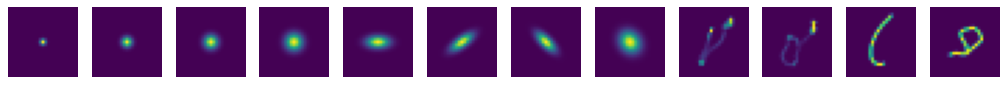

In [5]:
kernels = np.load("kernels.npy", allow_pickle=True)
print(kernels.shape)
plot_all([k for k in kernels])

In [6]:
OUT_PATH = "degraded-samples/"
RAWS = sorted(glob('../train_raws/1.npz'))
# MAX_VAL  = 2**12 - 1
DOWNSAMPLE = True

for ni, rawf in enumerate(RAWS):
    raw = np.load(rawf)
    raw_img = raw["raw"]
    raw_max = raw["max_val"]
    raw_img = (raw_img / raw_max).astype(np.float32) # 归一化并转换为 float32


    # 显示图像
    plt.imshow(raw_img)
    plt.show()

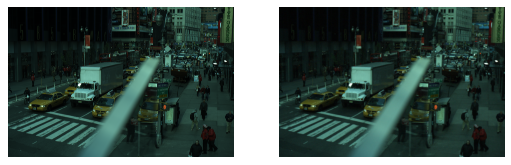

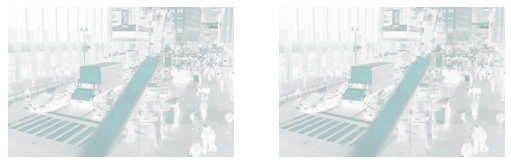

1.npz
原始图像分辨率: (1422, 2142, 4)
降级图像分辨率: torch.Size([711, 1071, 4])


In [34]:
#os.makedir(OUT_PATH,  exist_ok=True)

for ni, rawf in enumerate(RAWS):
    # raw = load_raw(rawf)
    raw = np.load(rawf)
    raw_img = raw["raw"]
    raw_max = raw["max_val"]
    raw = (raw_img / raw_max).astype(np.float32)  # 归一化并转换为 float32
    # raw = (raw / MAX_VAL).astype(np.float32)

    #plt.imshow(raw)
    #plt.show()

    # 获取原始图像的形状
    raw_shape = raw.shape

    # Apply degradations to the clean RAW (blur, noise, downsample)

    raw_deg = simple_deg_simulation(raw, kernels)

    # 获取降级图像的形状
    raw_deg_shape = raw_deg.shape

    if not DOWNSAMPLE:
        assert raw.shape == raw_deg.shape

    assert raw_deg.max() <= 1.
    assert raw_deg.min() >= 0.

    # Let's visualize the RAW images
    raw_rgb = postprocess_raw(demosaic(raw))
    raw_not_rgb = postprocess_raw(raw)

    raw_deg_rgb = postprocess_raw(demosaic(raw_deg))
    raw_deg_not_rgb = postprocess_raw(raw_deg)

    plot_all([raw_rgb, raw_deg_rgb], figsize=(8, 16))
    plot_all([raw_not_rgb, raw_deg_not_rgb], figsize=(8, 16))
    print(os.path.basename(rawf))

    # 显示分辨率信息
    print(f"原始图像分辨率: {raw_shape}")
    print(f"降级图像分辨率: {raw_deg_shape}")

    # Save the RAW image
    #raw_deg = (raw_deg * raw_max).astype(np.uint16)
    #np.save(os.path.join(OUT_PATH, os.path.basename(rawf)), raw_deg)

In [12]:
NVARIANTS = 5

for ni, rawf in enumerate(RAWS):

    # raw = load_raw(rawf)
    raw = np.load(rawf)
    raw_img = raw["raw"]
    raw_max = raw["max_val"]
    raw = (raw_img / raw_max).astype(np.float32)

    deg_variants = []

    for _ in range(NVARIANTS):
        raw_deg = simple_deg_simulation(raw, kernels)

        if not DOWNSAMPLE:
            assert raw.shape == raw_deg.shape

        assert raw_deg.max() <= 1.
        assert raw_deg.min() >= 0.

        raw_deg_rgb = postprocess_raw(demosaic(raw_deg))
        deg_variants.append(raw_deg_rgb)

    raw_rgb = postprocess_raw(demosaic(raw))
    plot_all([raw_rgb] + deg_variants, figsize=(15, 30))

AttributeError: module 'scipy.signal' has no attribute 'gaussian'